*SMTB-2021 :: "A Practical Intro to Probability Theory."*
*a@bochkarev.io*

**Last time we discussed (discrete) random variables:**
- Definition
- Quick examples: score on dice; an RV with countably many values (Poisson)
- Bernoulli scheme (a "biased" coin) and Binomial distribution (counting the number of "Heads").
- Characterizing RVs: PMF, CDF.

**This time, we generalize to...**

## Topic 4: Continuous Random Variables
- and try not to go crazy.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## Intuition re: continuous RVs
- so we had random variable $\xi$ that took a finite (or *countable*) number of values.
- we called it "discrete" and described with a probability for each value, a "probability mass function" $\mathbb{P}(\xi=x_i)=p_i$ (we could call it *distribution* as well).
- ... but what if we want *more* values? Say, "literally anything between 0 and 1"? (not strict yet)
- moreover, более того: intuitively, we might want to have a "probability per square meter", or something along these lines.

How to do that?

First: what is **histogram**?

![histogram](./images/histogram_blank.png)

### Probability density function
*(whiteboard)*
- informally: we'd like to model a "*frequency per unit of х*"
- this is called **probability density**, $p(x)$ (continuous, nonneggative function).
- note by the way that $\mathbb{P}(\xi=x)=0$ -- for any specific $x$.

This is a bit tough, so sometimes we like to describe such random variables with **"cumulative distribution function"** (CDF):

$$F_\xi(x) := \mathbb{P}(\xi \leq x)\nonumber.$$

Roughtly speaking,
- $F(-\infty)$ -- zero,
- $F(+\infty)$ -- one.
- $F$ -- nondecreasing.

(if you also don't like such inexact description -- what in the world is "F taken at infinity"?! -- you'd need to think in terms of something called *limits*, $\lim_{x\rightarrow \infty}F(x)=1$.)

Now, how to calculate $F(x)$ given $p(x)$?

A little more tricky: how to calculate $\mathbb{E}X$, given $p_X(x)$?

Therefore,
- $F_\xi(x) := \mathbb{P}(\xi \leq x) = \int_{-\infty}^x p(x)dx$
- $\mathbb{E}\xi := \int_{-\infty}^{\infty} xp(x)dx$ (ср. $\sum_{x=-\infty}^{\infty}x p(x)$ for discrete)
- $\textrm{Var}\xi$ is still: $\mathbb{E}(\xi-\mathbb{E}\xi)^2$.

### Some examples for continuous random variables
*(whiteboard)*

#### Uniform distribution over $[a,b]$
- $p(x) = 1/(b-a)$ for $x\in[a,b]$, and $0$ otherwise.
- $F(x) = 0$, for $x<a$; $1$ for $x>b$, and $(x-a)/(b-a)$ otherwise.

#### Normal distribution

$$p(x; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(x-\mu)^2}{2\sigma^2}\nonumber$$

/home/bochkarev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bochkarev/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Cumulative density, F(x)'}>

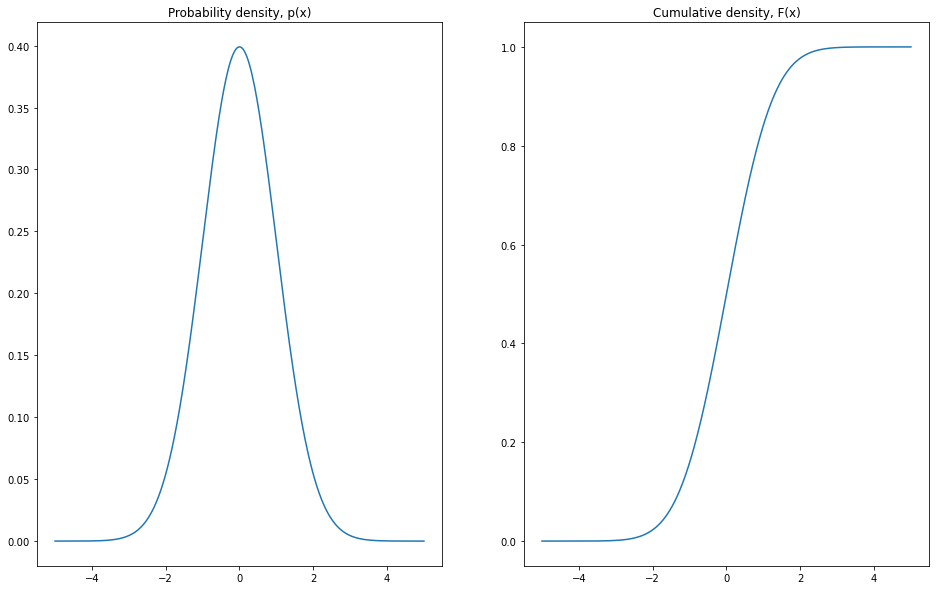

In [2]:
x = np.linspace(-5,5, 500); fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,10))
ax1.set_title("Probability density, p(x)"); sns.lineplot(x, norm.pdf(x), ax=ax1)
ax2.set_title("Cumulative density, F(x)");sns.lineplot(x, norm.cdf(x), ax=ax2)

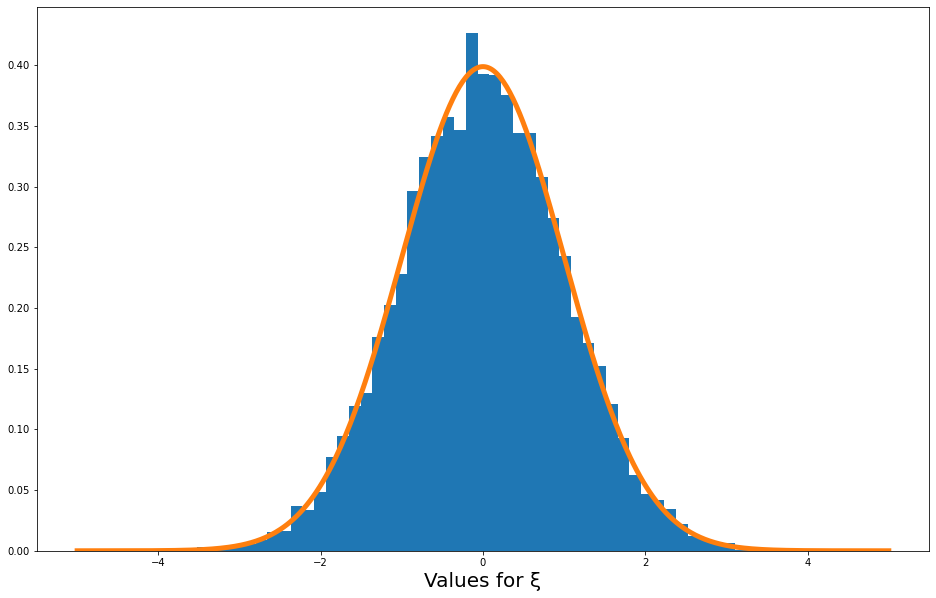

In [3]:
# numerical example

plt.subplots(figsize=(16,10)); plt.xlabel("Values for ξ", fontsize=20)
plt.hist([np.random.normal() for _ in range(10000)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

### Central Limit Theorem (a quick illustration)

- Let's pick any random variable -- say, Binomial, $\mathbb{P}(\xi=x)=C_n^k p^k(1-p)^{n-k}$.
- let's take a sample of $m$ realizations, and compute the mean $X_m := (\xi_1 + \ldots + \xi_m) / m$ -- this will be another random variable!
- Now let's make it continuous, like this: $\eta := \frac{X_m-\mathbb{E}(\xi)}{\sigma\sqrt{m}}=\frac{X_m-np}{\sqrt{np(1-p)/m}}$. 
- And consider its distribution.

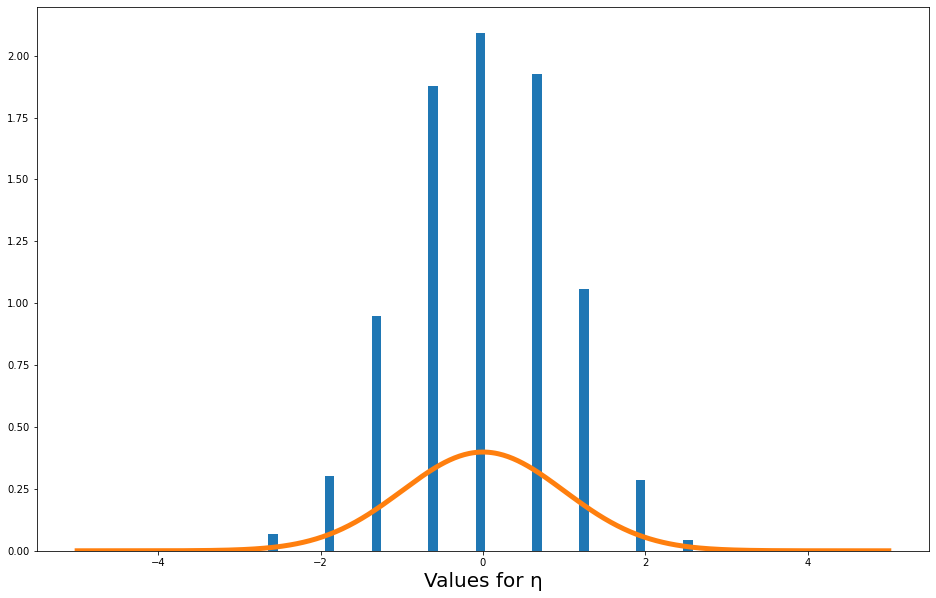

In [31]:
p = 0.6; n=10

def X(m):
    return sum([np.random.binomial(n,p) for _ in range(m)])/m

def eta(m):
    return (X(m) - n*p)/(np.sqrt(n*p*(1-p)/m))

m = 1

plt.subplots(figsize=(16,10)); plt.xlabel("Values for η", fontsize=20)
plt.hist([eta(m) for _ in range(1000)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

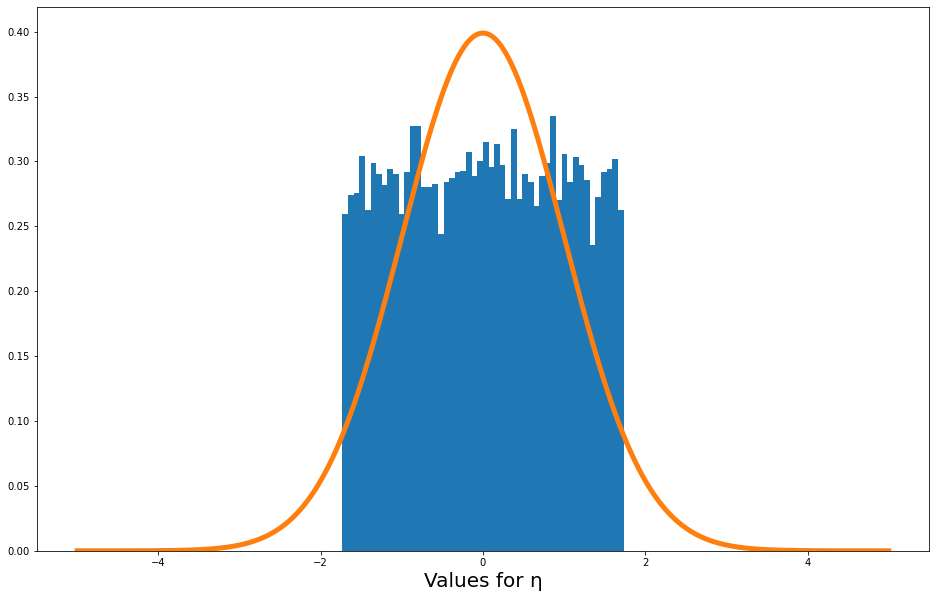

In [34]:
# is it, indeed?..
N = 10000

m=1

def X(m):
    return sum([np.random.uniform() for _ in range(m)])/m

def eta(m):
    return (X(m) - 0.5)/np.sqrt(((1/12)/m))

plt.subplots(figsize=(16,10)); plt.xlabel("Values for η", fontsize=20)
plt.hist([eta(m) for _ in range(N)], bins=50, density=True);
plt.plot(x, norm.pdf(x), linewidth=5); 

The general idea is: $\eta := \sqrt{n}(\bar{\xi}-\mathbb{E}\xi)$, where $\bar{\xi} := (\xi_1+\ldots+\xi_n)$, starts to behave like a normal one, $N(\mu=0, \sigma=D\xi)$.

*SMTB-2021 :: "A Practical Intro to Probability Theory."*
*a@bochkarev.io*

## Conclusion.
**👉 Now, Conclusion**
- Quick summary.
- On different/popular types of random variables.
- On random models of random things.

**So, in this course we discussed:**

- Topic 1: Model for Random Events (Prob space)
- Topic 2: Independence, Tests, Conditional probability.
- Topic 3: Random Variables: definition, characteristics, and the Bernoulli scheme.
- Topic 4: Random Variables: continuous case (PDF, CDF, etc.)